In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
# let's see the 1st ten data points
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
# checking the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Statistical description of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


<AxesSubplot:>

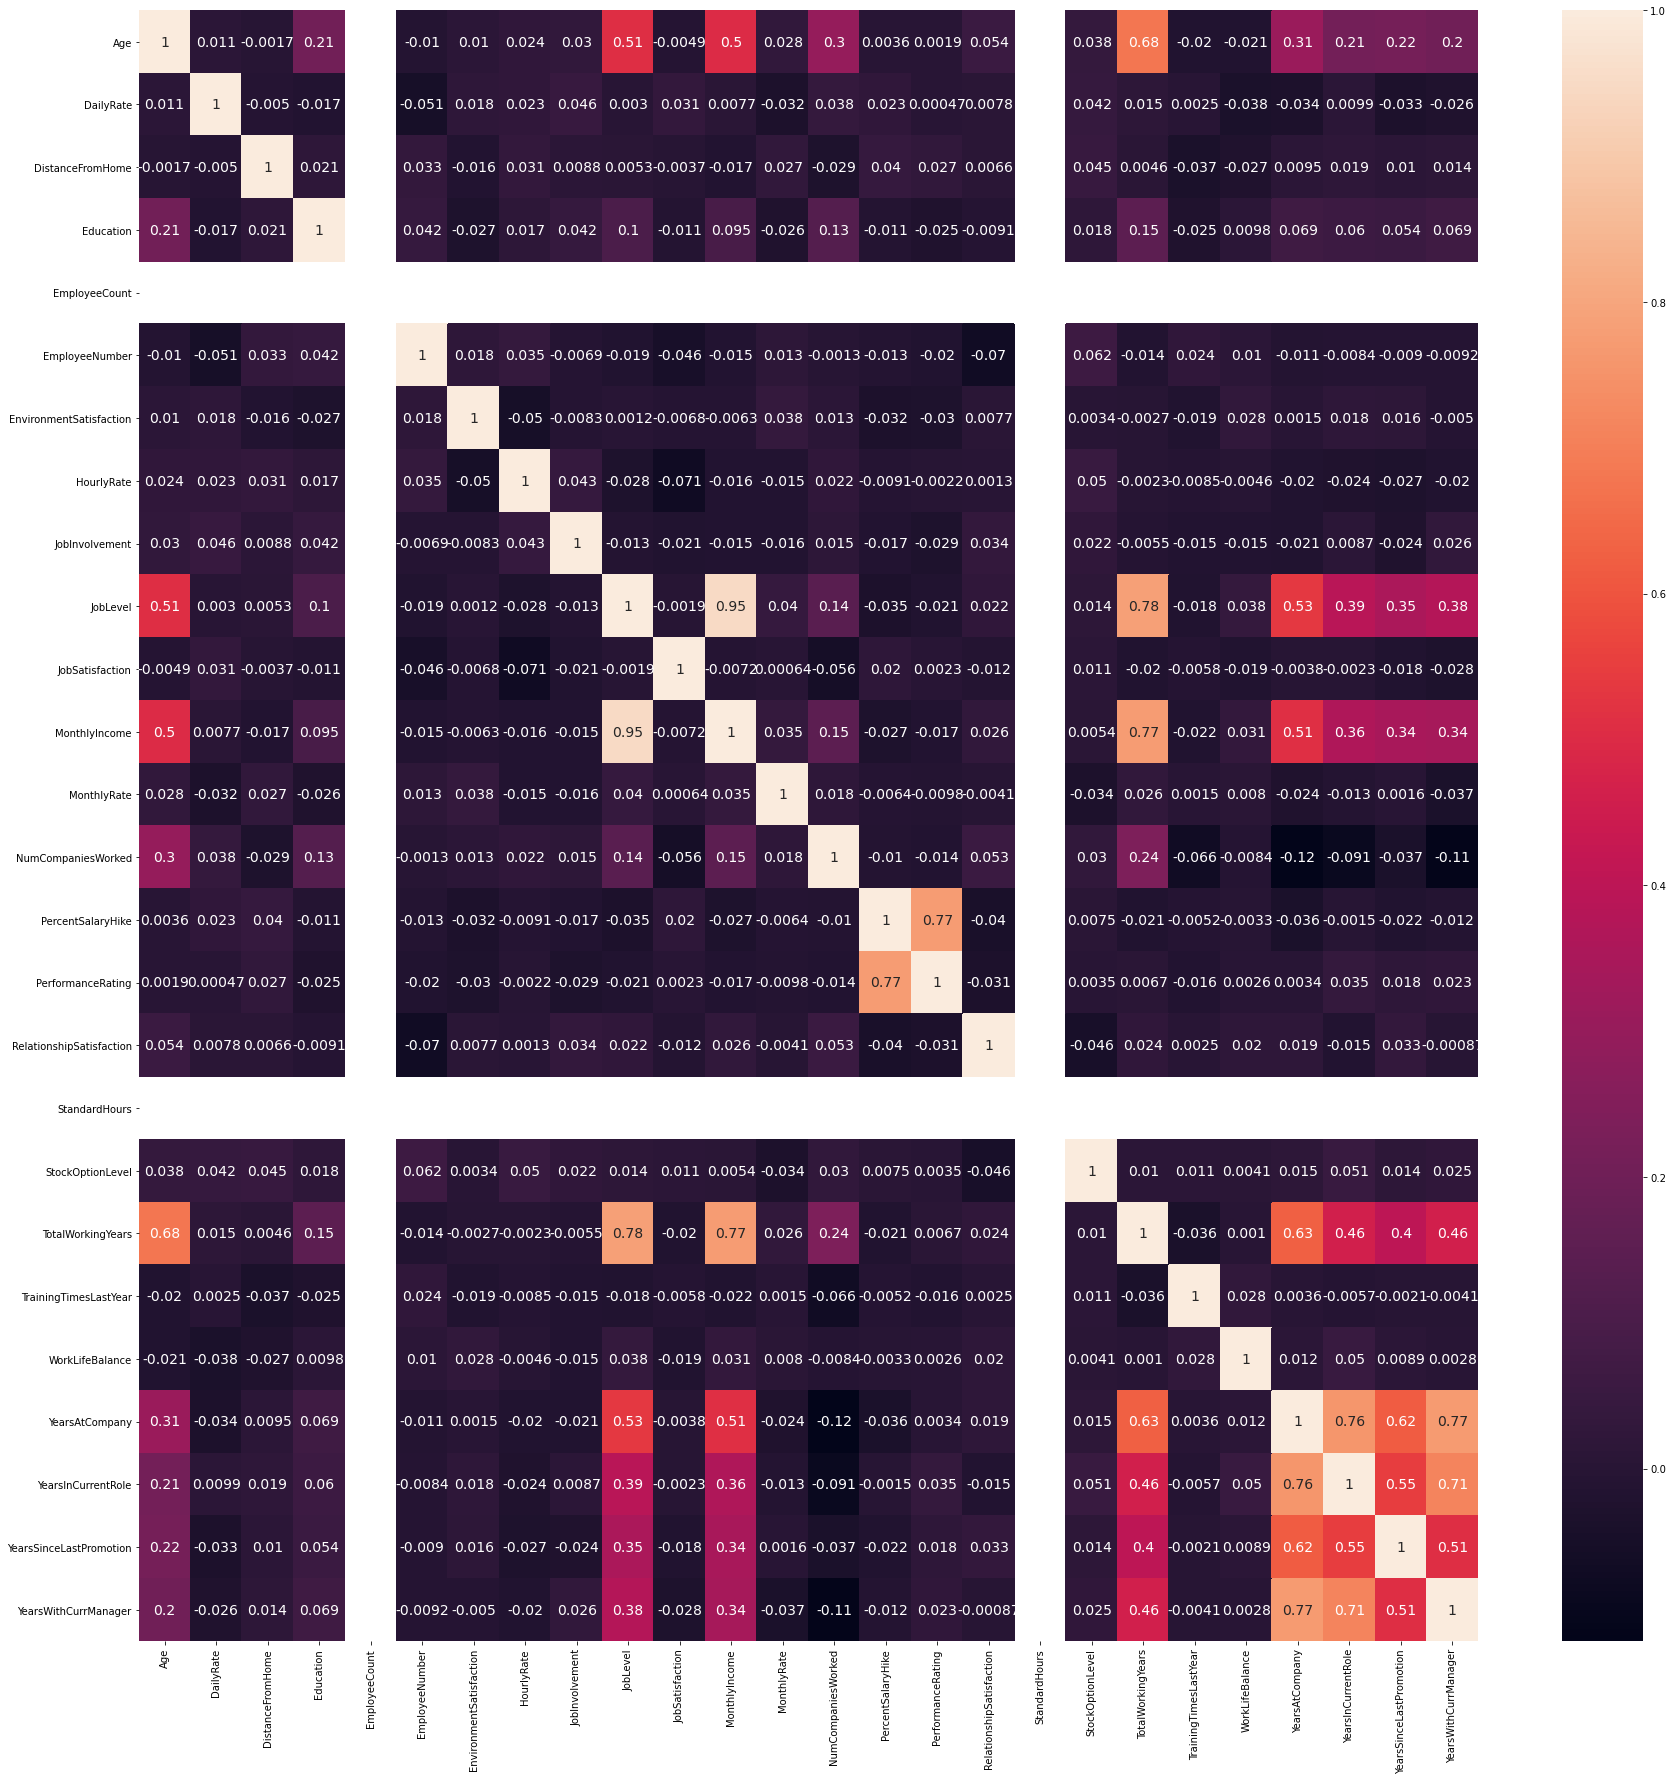

In [8]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True,  annot_kws={"size":14})

In [9]:
#Checking the shape of the data
df.shape

(1470, 35)

In [10]:
#Checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# change the Attrition column to numeric
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
def bar_chart(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

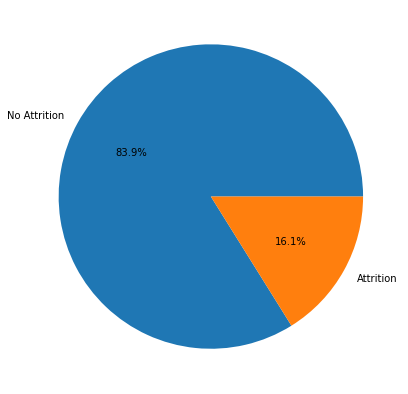

In [13]:
# let's take a look at the disrtibution of the data
fig = plt.figure(figsize =(10, 7))
plt.pie(df['Attrition'].value_counts(), labels = ['No Attrition', 'Attrition'], autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

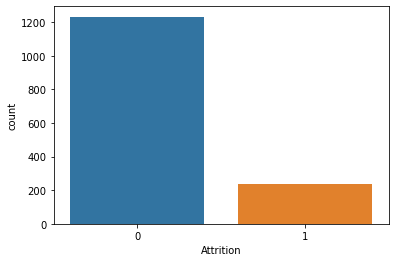

In [14]:
sns.countplot(df['Attrition'])

36.923809523809524


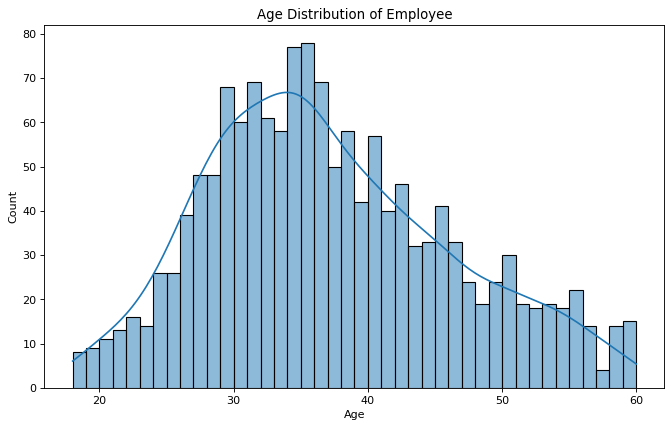

In [15]:
# let's see how age affects Attrition, we'll look at the distribution of age first
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('Age Distribution of Employee')
print(df['Age'].mean())

Text(0.5, 1.0, 'Attrition by Age')

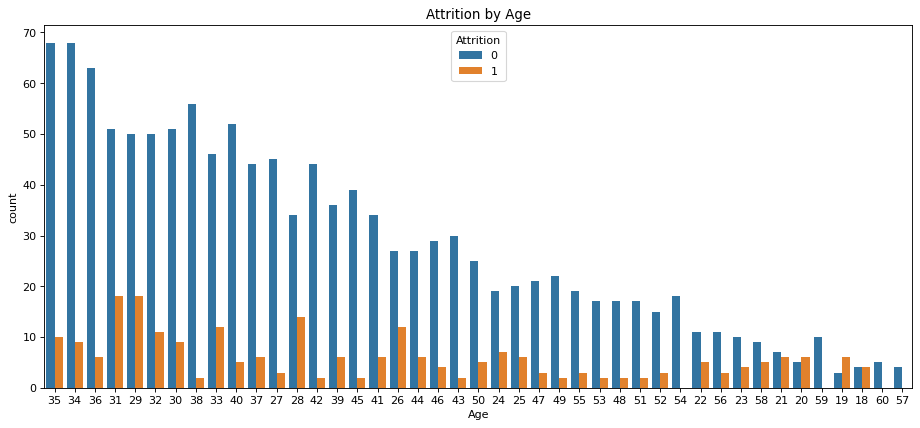

In [16]:
# Now let's check the effect of age on Attrtion
plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='Age', hue='Attrition', order = df['Age'].value_counts().index).set_title('Attrition by Age')

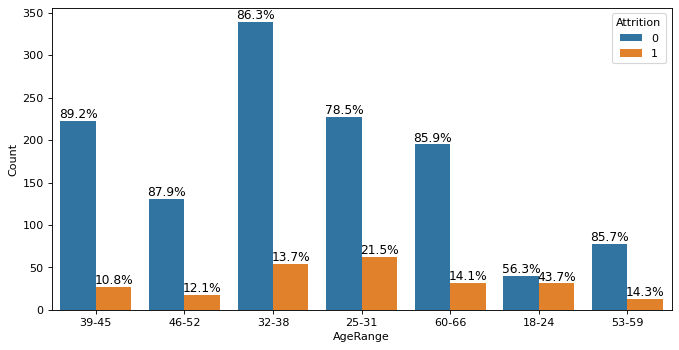

In [17]:
# We'll gorup the workers into various age ranges to get more insights
agerange = []
for age in df["Age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    else:
        agerange.append("60-66")

df1 = df.copy()       
df1["AgeRange"] = agerange
plt.figure(figsize=(10,5), dpi=80)
age_range = sns.countplot(x="AgeRange", hue="Attrition", data=df1)
age_range.set(xlabel='AgeRange', ylabel='Count')

bar_chart(age_range)
plt.show()

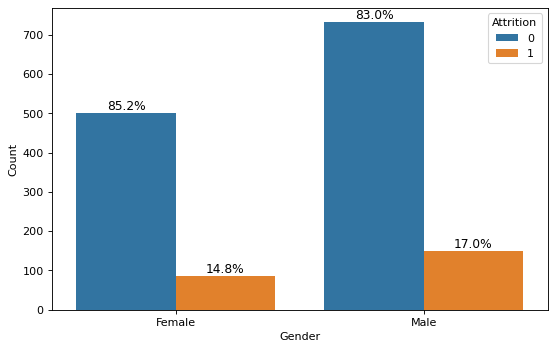

In [18]:
#let's see if gender affects Attrition
plt.figure(figsize=(8,5), dpi=80)
gender = sns.countplot(x="Gender", hue="Attrition", data=df)
gender.set(xlabel='Gender', ylabel='Count')

bar_chart(gender)
plt.show()

0    1233
1     237
Name: Attrition, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64


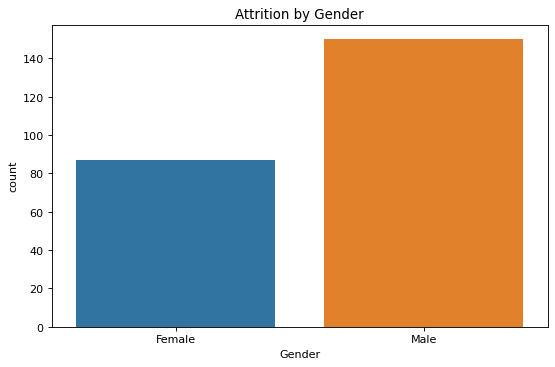

In [19]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 1)], x='Gender').set_title('Attrition by Gender')
print(df['Attrition'].value_counts())
print(df['Gender'].value_counts())

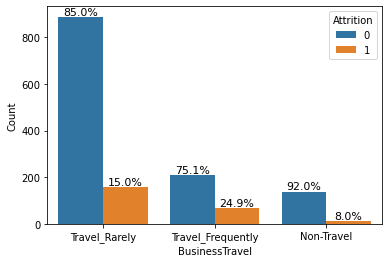

In [20]:
# let's see how bussiness travel affects Attrition
travel = sns.countplot(x="BusinessTravel", hue="Attrition", data=df)
travel.set(xlabel='BusinessTravel', ylabel='Count')

bar_chart(travel)
plt.show()

Text(0.5, 1.0, 'Attrition by Distance')

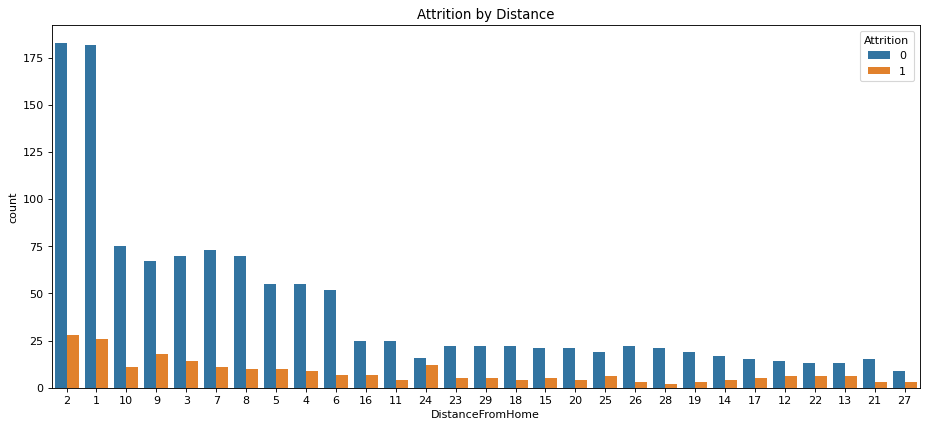

In [21]:
# let's check the effect of distance on Attrtion
plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='DistanceFromHome', hue='Attrition', order = df['DistanceFromHome'].value_counts().index).set_title('Attrition by Distance')

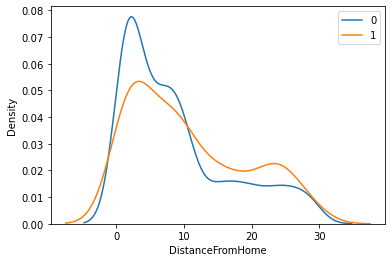

In [22]:
Attrition_N = df[df['Attrition']==0]
Attrition_Y = df[df['Attrition']==1]
sns.kdeplot(Attrition_N.DistanceFromHome)
sns.kdeplot(Attrition_Y.DistanceFromHome)
plt.legend(('0', '1'))

Text(0.5, 1.0, 'Attrition VS. Monthly Income')

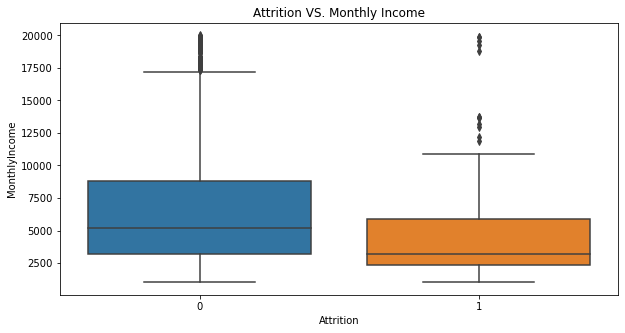

In [23]:
# let's see the effect of monthly income on Attrition
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Attrition'],y=df['MonthlyIncome'])
plt.title('Attrition VS. Monthly Income')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

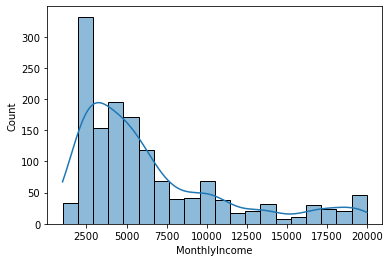

In [24]:
sns.histplot(data=df, x="MonthlyIncome", kde=True)

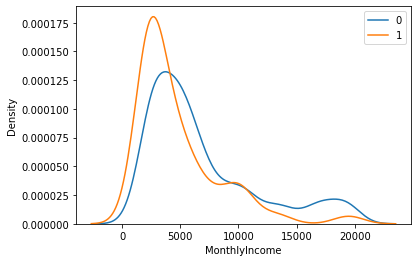

In [25]:
sns.kdeplot(Attrition_N.MonthlyIncome)
sns.kdeplot(Attrition_Y.MonthlyIncome)
plt.legend(('0', '1'))

Text(0.5, 1.0, 'Attrition by Department')

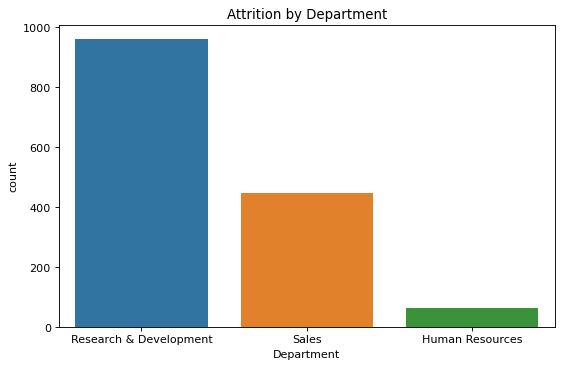

In [26]:
# let's evaluate Attrition by Department
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition']) == 0], x=df['Department'],order = df['Department'].value_counts().index).set_title('Attrition by Department')

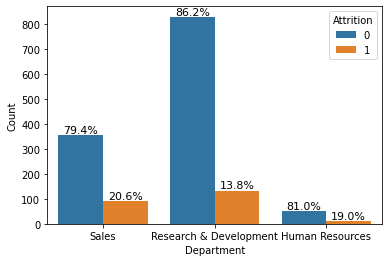

In [27]:
depart = sns.countplot(x="Department", hue="Attrition", data=df)
depart.set(xlabel='Department', ylabel='Count')

bar_chart(depart)
plt.show()

<AxesSubplot:xlabel='Department', ylabel='Count'>

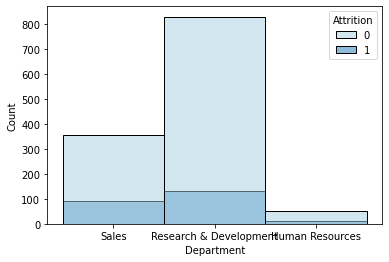

In [28]:
sns.histplot(x='Department',data=df,hue='Attrition',palette='Paired')

<AxesSubplot:xlabel='JobRole', ylabel='Count'>

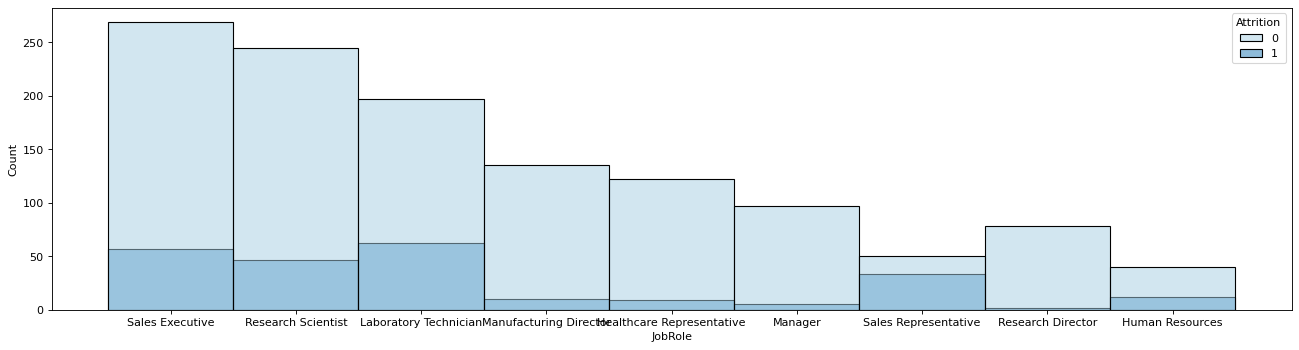

In [29]:
# let's evaluate Attrition by JobRole
plt.figure(figsize=(20,5), dpi=80)
sns.histplot(x='JobRole',data=df,hue='Attrition',palette='Paired')

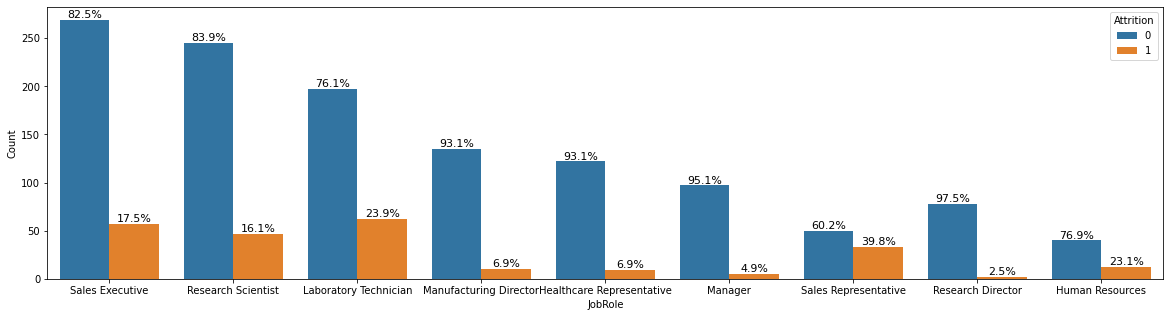

In [30]:
plt.figure(figsize=(20, 5))
jobrole = sns.countplot(x="JobRole", hue="Attrition", data=df)
jobrole.set(xlabel='JobRole', ylabel='Count')

bar_chart(jobrole)
plt.show()

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Count'>

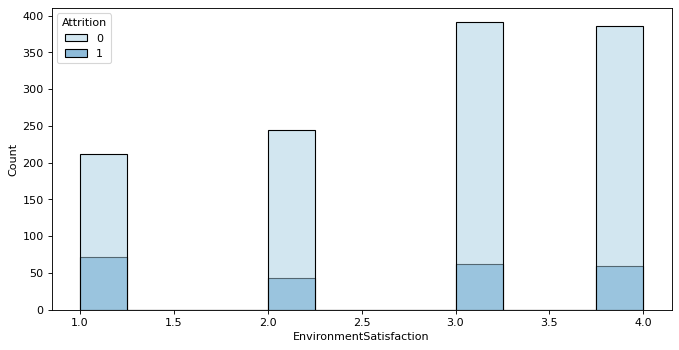

In [31]:
# let's see how Attrition is affected by Environment Satisfaction
plt.figure(figsize=(10,5), dpi=80)
sns.histplot(x='EnvironmentSatisfaction',data=df,hue='Attrition',palette='Paired')

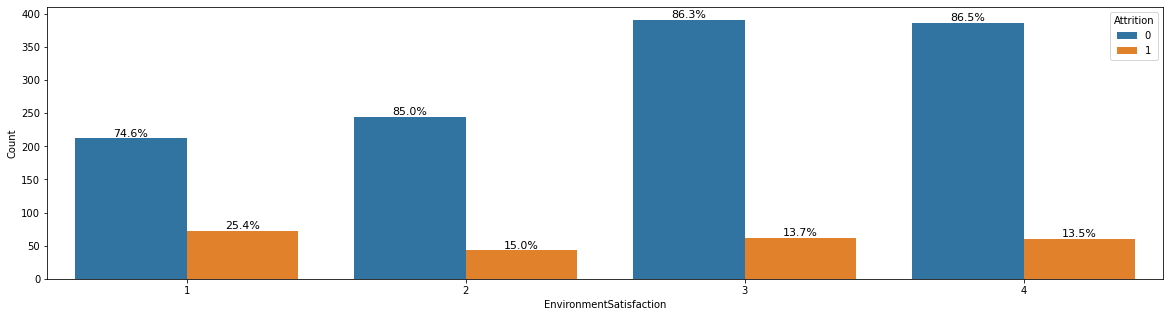

In [32]:
plt.figure(figsize=(20, 5))
environ = sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=df)
environ.set(xlabel='EnvironmentSatisfaction', ylabel='Count')

bar_chart(environ)
plt.show()

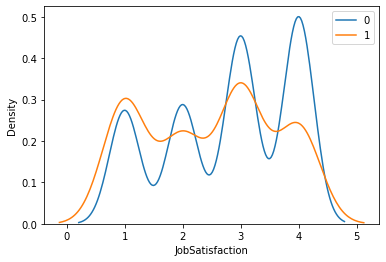

In [33]:
# Let's see how Job Satisfaction affects Attrition
sns.kdeplot(Attrition_N.JobSatisfaction)
sns.kdeplot(Attrition_Y.JobSatisfaction)
plt.legend(('0', '1'))

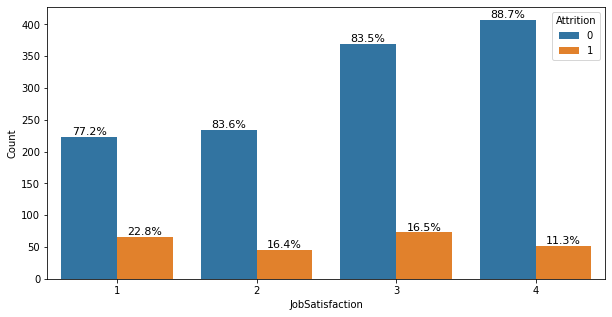

In [34]:
plt.figure(figsize=(10, 5))
jobsat = sns.countplot(x="JobSatisfaction", hue="Attrition", data=df)
jobsat.set(xlabel='JobSatisfaction', ylabel='Count')

bar_chart(jobsat)
plt.show()

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Count'>

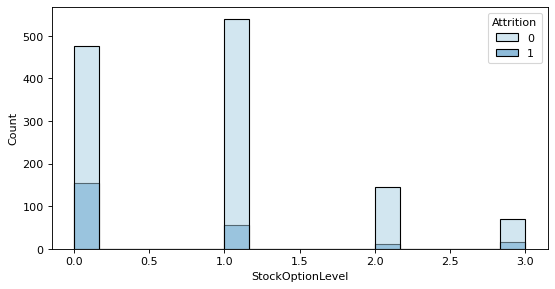

In [35]:
# let's see how Attrition is affected by StockOptionLevel
plt.figure(figsize=(8,4), dpi=80)
sns.histplot(x='StockOptionLevel',data=df,hue='Attrition',palette='Paired')

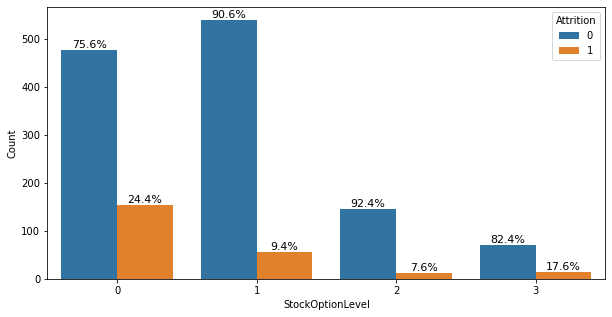

In [36]:
plt.figure(figsize=(10, 5))
stock = sns.countplot(x="StockOptionLevel", hue="Attrition", data=df)
stock.set(xlabel='StockOptionLevel', ylabel='Count')

bar_chart(stock)
plt.show()

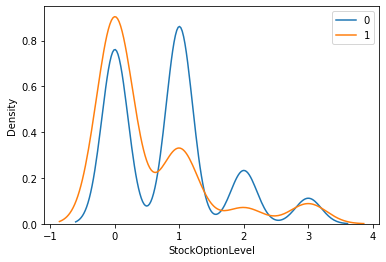

In [37]:
sns.kdeplot(Attrition_N.StockOptionLevel)
sns.kdeplot(Attrition_Y.StockOptionLevel)
plt.legend(('0', '1'))

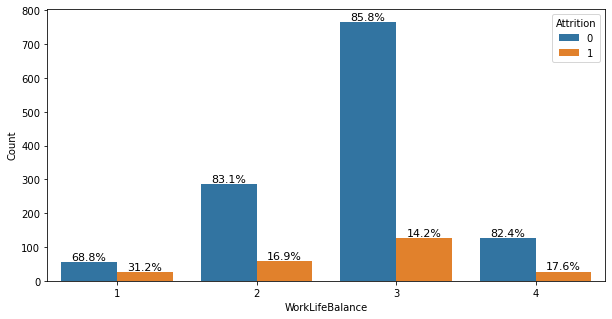

In [38]:
# let's see how Attrition is affected by WorkLifeBalance
plt.figure(figsize=(10, 5))
worklife = sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df)
worklife.set(xlabel='WorkLifeBalance', ylabel='Count')

bar_chart(worklife)
plt.show()

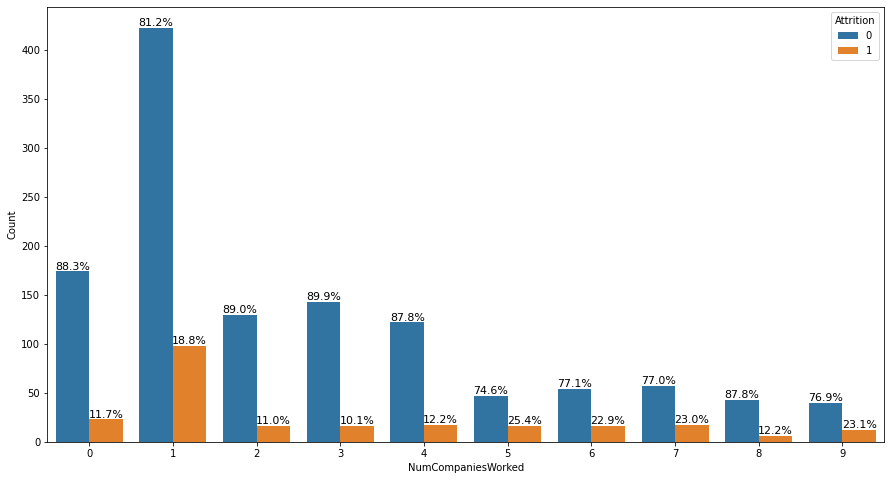

In [39]:
# let's see if Attrition is affected by Work Experience
plt.figure(figsize=(15, 8))
experience = sns.countplot(x="NumCompaniesWorked", hue="Attrition", data=df)
experience.set(xlabel='NumCompaniesWorked', ylabel='Count')

bar_chart(experience)
plt.show()

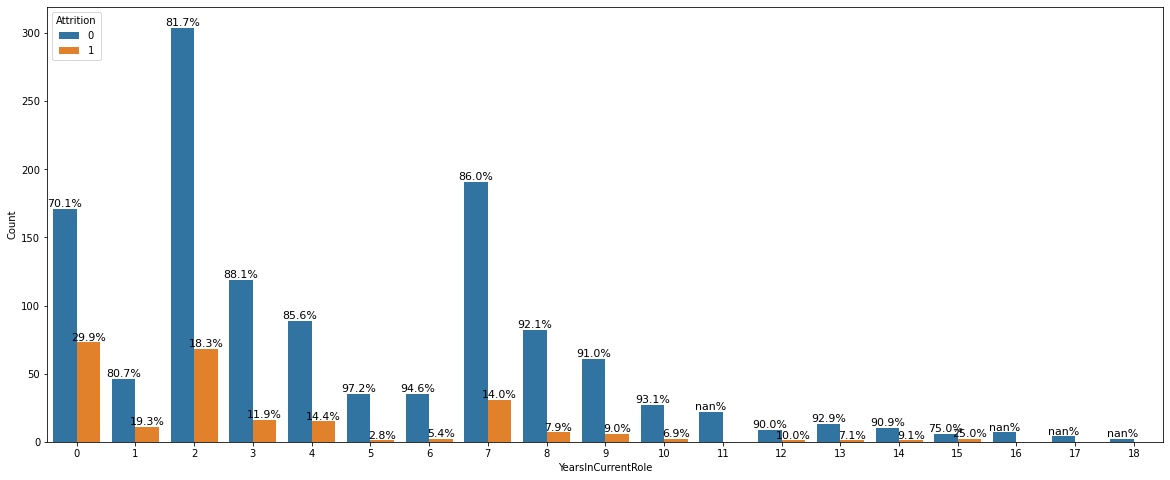

In [40]:
# let's see if Attrition is affected by YearsInCurrentRole
plt.figure(figsize=(20, 8))
duration = sns.countplot(x="YearsInCurrentRole", hue="Attrition", data=df)
duration.set(xlabel='YearsInCurrentRole', ylabel='Count')

bar_chart(duration)
plt.show()

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

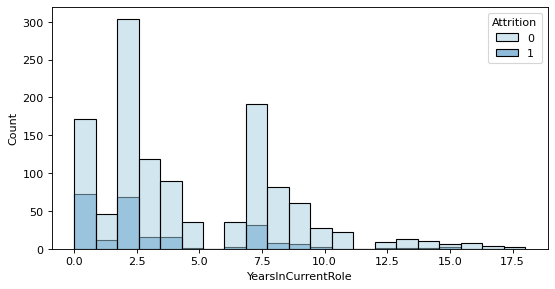

In [41]:
plt.figure(figsize=(8,4), dpi=80)
sns.histplot(x='YearsInCurrentRole',data=df,hue='Attrition',palette='Paired')

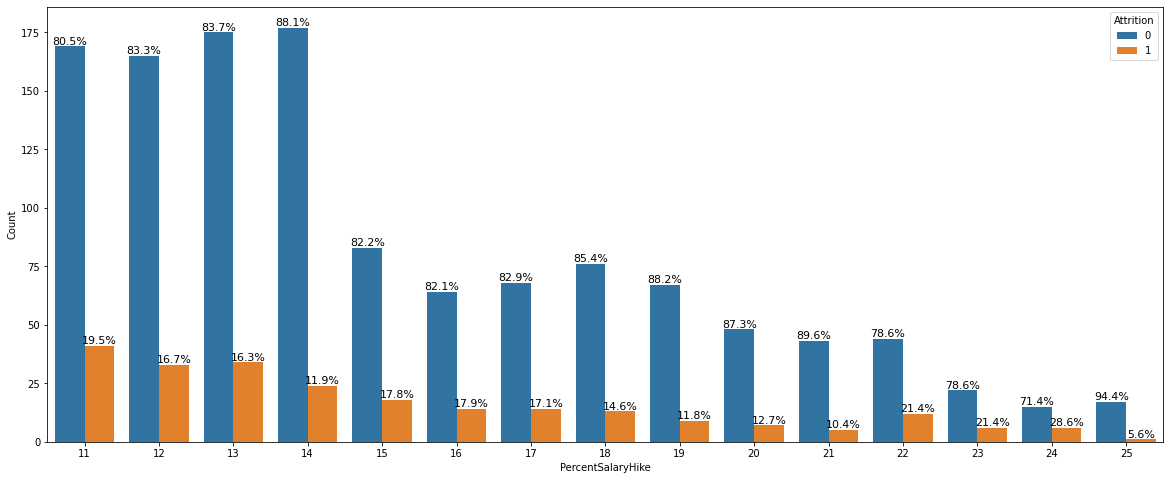

In [42]:
# let's see if Attrition is affected by Salary Hike
plt.figure(figsize=(20, 8))
hike = sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df)
hike.set(xlabel='PercentSalaryHike', ylabel='Count')

bar_chart(hike)
plt.show()

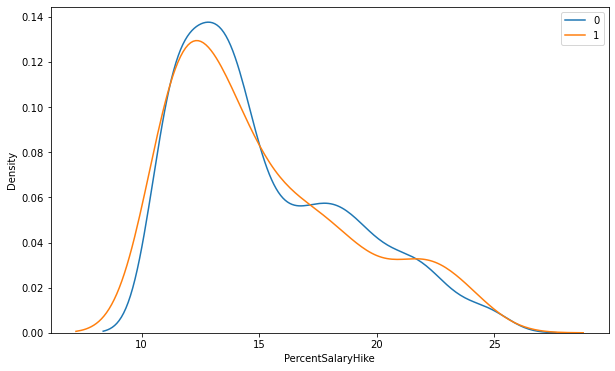

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(Attrition_N.PercentSalaryHike)
sns.kdeplot(Attrition_Y.PercentSalaryHike)
plt.legend(('0', '1'))

<AxesSubplot:xlabel='YearsAtCompany'>

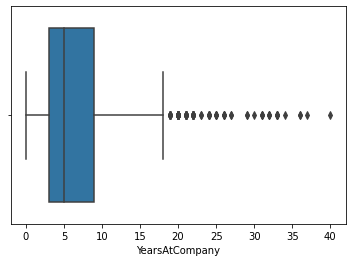

In [44]:
# let's see how long people stay in the company
sns.boxplot(x=df['YearsAtCompany'])

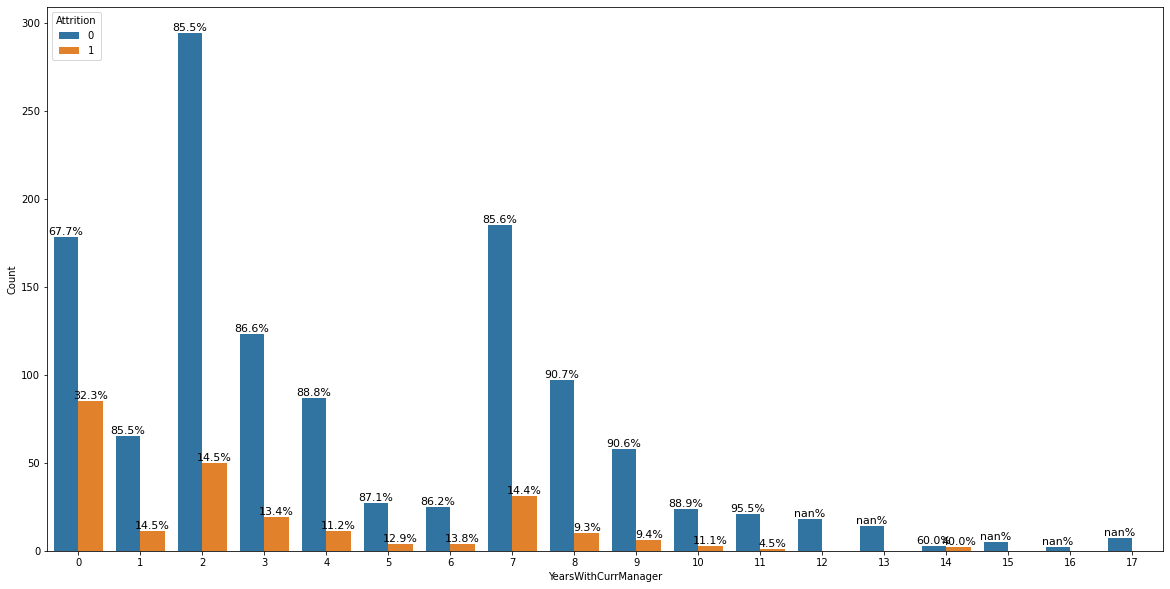

In [45]:
# let's see if Attrition is affected by The Management
plt.figure(figsize=(20, 10))
manager = sns.countplot(x="YearsWithCurrManager", hue="Attrition", data=df)
manager.set(xlabel='YearsWithCurrManager', ylabel='Count')

bar_chart(manager)
plt.show()

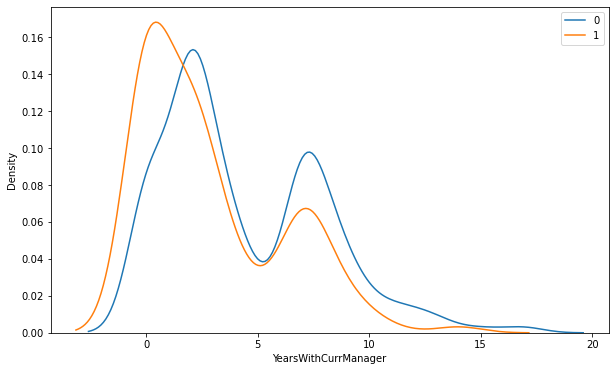

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(Attrition_N.YearsWithCurrManager)
sns.kdeplot(Attrition_Y.YearsWithCurrManager)
plt.legend(('0', '1'))

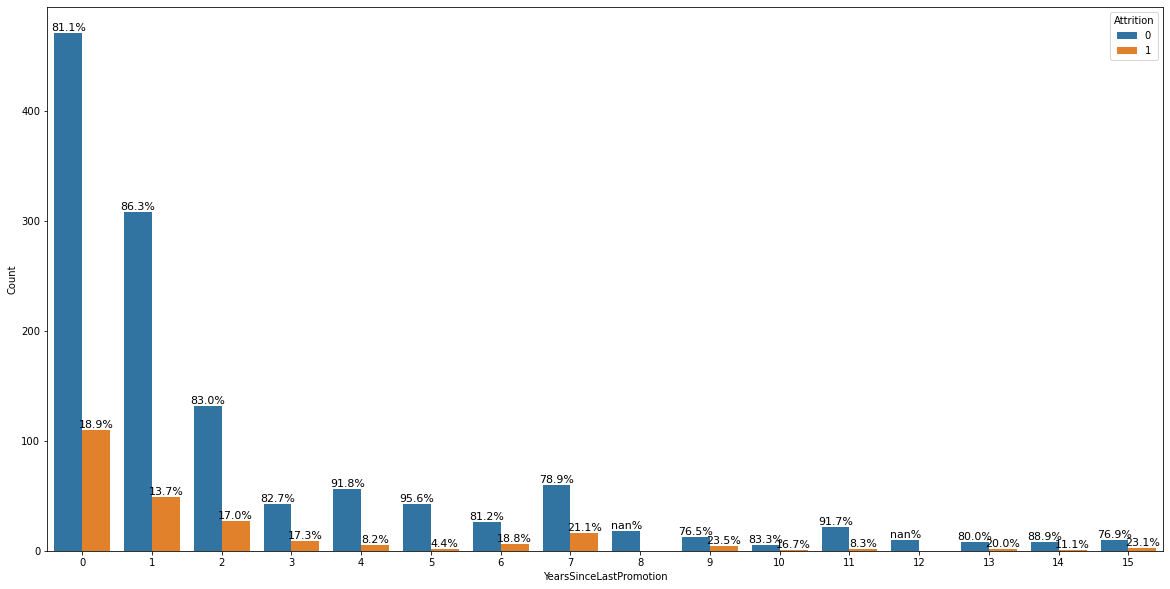

In [47]:
# let's see if Attrition is affected by Promotion
plt.figure(figsize=(20, 10))
promotion = sns.countplot(x='YearsSinceLastPromotion', hue="Attrition", data=df)
promotion.set(xlabel='YearsSinceLastPromotion', ylabel='Count')

bar_chart(promotion)
plt.show()

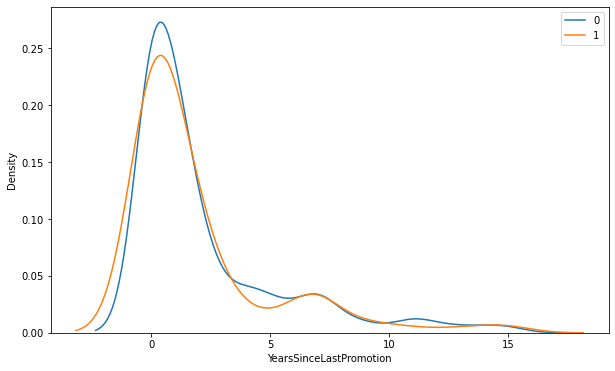

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(Attrition_N.YearsSinceLastPromotion)
sns.kdeplot(Attrition_Y.YearsSinceLastPromotion)
plt.legend(('0', '1'))

### After having gain insights from our data, we would do some preprocessing to get our data ready for model training

In [49]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

Age: Number of unique values 43
________________________________________________
Attrition: Number of unique values 2
________________________________________________
BusinessTravel: Number of unique values 3
________________________________________________
DailyRate: Number of unique values 886
________________________________________________
Department: Number of unique values 3
________________________________________________
DistanceFromHome: Number of unique values 29
________________________________________________
Education: Number of unique values 5
________________________________________________
EducationField: Number of unique values 6
________________________________________________
EmployeeCount: Number of unique values 1
________________________________________________
EmployeeNumber: Number of unique values 1470
________________________________________________
EnvironmentSatisfaction: Number of unique values 4
________________________________________________
Gender: Numb

In [50]:
# dropping non useful columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


In [51]:
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [52]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [54]:
# Now we will split the data into testing and training sets
x = df.drop('Attrition', axis=1)
y = df.Attrition
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [55]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [57]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.958919,0.587850,-0.413973,-0.500989,-0.036578,-0.866067,-0.941395,0.270496,0.828785,-0.547908,...,2.339166,0.234944,-0.935308,-1.343310,1.015228,0.335827,-0.998443,-0.902661,-0.679685,-1.168838
1,-0.430695,0.587850,1.176070,-0.500989,0.699024,-1.835797,0.536401,-0.651162,0.828785,-0.449557,...,-0.427503,1.154171,-0.935308,0.478372,-0.598161,1.734881,0.010293,0.493249,1.493316,0.812136
2,1.643324,0.587850,1.296833,-0.500989,0.208623,1.073395,-0.941395,1.192155,-1.206585,0.829007,...,2.339166,-0.684284,0.247041,-0.302349,0.208533,0.335827,-0.325952,-0.623479,-0.369256,-0.036853
3,-1.085648,-0.891117,-0.549831,-0.500989,-0.894779,0.103664,0.536401,1.192155,0.828785,1.074884,...,-0.427503,0.234944,-0.935308,-0.692709,-2.211550,-1.063226,-0.494075,-0.623479,-0.369256,-0.602845
4,-0.321536,-0.891117,-1.274408,1.387354,-0.894779,1.073395,-0.202497,0.270496,-1.206585,0.484778,...,-0.427503,1.154171,0.247041,-0.692709,0.208533,0.335827,-0.494075,-0.344297,-0.369256,-0.602845


In [58]:
# let's check for skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [59]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

                     feature        VIF
0                        Age   2.110223
1             BusinessTravel   1.035628
2                  DailyRate   1.027446
3                 Department   2.036470
4           DistanceFromHome   1.020426
5                  Education   1.074486
6             EducationField   1.025311
7    EnvironmentSatisfaction   1.027071
8                     Gender   1.040514
9                 HourlyRate   1.033354
10            JobInvolvement   1.026339
11                  JobLevel  11.248115
12                   JobRole   1.955595
13           JobSatisfaction   1.030344
14             MaritalStatus   1.800360
15             MonthlyIncome  10.257789
16               MonthlyRate   1.028356
17        NumCompaniesWorked   1.256320
18                  OverTime   1.039543
19         PercentSalaryHike   2.540393
20         PerformanceRating   2.537475
21  RelationshipSatisfaction   1.041520
22          StockOptionLevel   1.797718
23         TotalWorkingYears   4.781224


### Now we will move ahead with model training

In [60]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [61]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.880466472303207
[1]K Nearest Neighbor Training Accuracy: 0.8775510204081632
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.880466472303207
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9115646258503401
[4]Ada Boost Training Accuracy: 0.9135082604470359
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9834791059280855


In [62]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[361   9]
 [ 50  21]]
Model[0] Testing Accuracy = "0.8662131519274376 !"

[[364   6]
 [ 60  11]]
Model[1] Testing Accuracy = "0.8503401360544217 !"

[[361   9]
 [ 50  21]]
Model[2] Testing Accuracy = "0.8662131519274376 !"

[[366   4]
 [ 58  13]]
Model[3] Testing Accuracy = "0.8594104308390023 !"

[[352  18]
 [ 45  26]]
Model[4] Testing Accuracy = "0.8571428571428571 !"

[[324  46]
 [ 48  23]]
Model[5] Testing Accuracy = "0.7868480725623582 !"

[[364   6]
 [ 61  10]]
Model[6] Testing Accuracy = "0.8480725623582767 !"



In [63]:
# Regularization Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10,100)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 68}


In [64]:
rf = RandomForestClassifier(criterion='gini',max_features='log2', n_estimators=67)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

82.53968253968253
85.51020408163265


In [65]:
# Regularization Logistic Regression
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'l2'}


In [66]:
lr = LogisticRegression(fit_intercept:='l2', intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

86.62131519274377
84.21768707482993


In [67]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 1}


In [68]:
ab = AdaBoostClassifier(learning_rate=1.0,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

83.21995464852607
86.53061224489797


In [69]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'min_samples_split': 5, 'splitter': 'random'}


In [70]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=9, splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

78.00453514739229
79.8639455782313


In [71]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,100)),
             'kernel':['poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}


In [73]:
svc = SVC(gamma='scale', kernel='rbf', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

85.94104308390023
83.87755102040816


In [75]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'weights':['uniform', 'distance'],
             'n_neighbors':list(range(1,10)),
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}


In [79]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=4, weights='uniform')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = dt.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

78.00453514739229
83.33333333333334


In [80]:
import pickle
pickle.dump(dt, open('hrattrition','wb'))